# Representing Wavefunctions and Using Approximations for Analysis

## Frederico Wieser 18018699

Continuing on from last weeks assignment we again this week are having a look at quantum harmonic oscillators, wavefunctions and their corresponding energies.

In this notebook we will explore the wavefunction 

$$
\psi(x) = (2\alpha/\pi)^{1/4} e^{-\alpha x^2}
$$

We will be using methods learnt in class to approximate values of the second derivative and also then using Matplotlib to plot both the wavefunction and it's corresponding second derivative, with respect to $ x $.

We will then explore the shape plots of the kinetic and potential energy contributions in our system, for each value of $ x $. Using this information to calculate and compare our approximation.

In this notebook we will deal first with a system where

$$
\alpha = 1
$$

and then a system where

$$
\alpha = 0.5
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Section on wavefunction and derivatives

I have chosen to use the below value of dx for my step value since through testing I have found this value to give very accurate results. Values lower do and did give more accurate results but are more computationaly expensive for a relatively small amount of improvement. For this reason I have chosen my spacing $ \Delta x = 0.001 $.

In [2]:
# Parameters for creating our numpy array, x coordinate.
dx = 0.001
start = -5
stop = 5

x = np.arange(start, stop, dx)

def psi_f(x):
    '''
    Returns back the wavefunction value(s) of the x input, for the 
    alpha value defined in the function.
    '''
    # Alpha value in wavefunction
    alpha = 1
    
    psi = ((2*alpha/np.pi)**0.25)*np.exp(-alpha*((x)**2))
    
    return psi

In [3]:
def d2f(fun, x, dx):
    '''
    A function to approximately evaluate a second order derivative 
    using finite differences.
    
    Input:
    
    fun = The function we are trying to calculate second derivative of.
    
    x = Parameter(s) of the original function where second derivative
        wants to be calculated.
    
    dx = Finite difference used in the approximation
    '''
    # Calcualting the differences the finite steps make in the x value.
    x_pos_step = x + dx
    x_neg_step = x - dx
    
    # Second-order centred difference formula
    d2f = (fun(x_pos_step) - 2*fun(x) + fun(x_neg_step))/(dx**2)
        
    return d2f

In [4]:
# Creating numpy arrays for wavefunction and second derivative.
psi = psi_f(x)
d2psi = d2f(psi_f, x, dx)

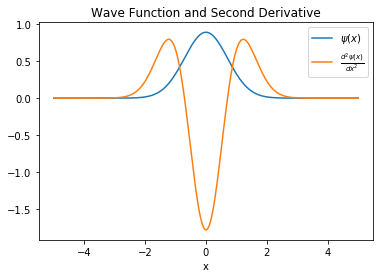

In [5]:
plt.plot(x, psi, label = r"$\psi(x)$")
plt.plot(x, d2psi, label = r"$\frac{d^2\psi(x)}{dx^2}$")
plt.xlabel("x")
plt.title("Wave Function and Second Derivative")
plt.legend()
plt.show()

### Section on evaluating the energy

Now that we have an array filled with approximate values for the second derivative we will use this information in order to calculate and then plot the kinetic and potential energy contributions in our system, for each value of $ x $.

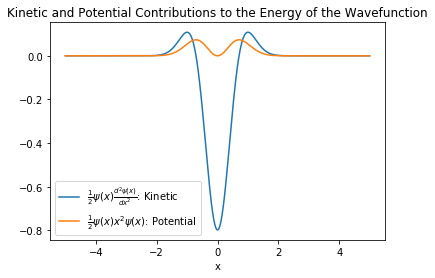

In [6]:
# Calculating kinetic contribution.
dKE = 0.5*psi*d2psi

# Calculating potential contribution.
dPE = 0.5*psi*psi*x*x

# Plotting the kinetic and potential contributions.
plt.plot(x, dKE, label = r"$\frac{1}{2}\psi(x) \frac{d^2\psi(x)}{dx^2} $: Kinetic")
plt.plot(x, dPE, label = r"$ \frac{1}{2}\psi(x)x^2\psi(x)$: Potential")
plt.xlabel("x")
plt.title("Kinetic and Potential Contributions to the Energy of the Wavefunction")
plt.legend()
plt.show()

Using the integrate class from SciPy we are able to evaluate the following integrals of the above plotted variables to find the total kinetic and potential energy of the system
$$
E_{KE}=-\frac{1}{2}\int \psi(x)\frac{d^2\psi}{dx^2} dx
$$
$$
E_{PE}=\frac{1}{2}\int \psi(x)x^2\psi(x) dx
$$

In [13]:
from scipy import integrate

# Calculate Kinetic Energy
KE = -integrate.simps(dKE, x)

# Calculate Potential Energy
PE = integrate.simps(dPE, x)

# Print results
print('Kinetic energy = ' + str(KE) + ' .')
print('Potential energy = ' + str(PE) + ' .')
print('total energy = ' + str((KE + PE)) + ' .')

Kinetic energy = 0.2499999687691449 .
Potential energy = 0.2499999999799287 .
total energy = 0.4999999687490736 .


The relative sizes of the energy are

$$
E_{KE} \approx 0.499
$$

$$
E_{PE}=0.125
$$

This implies from our integrals that the kinetic contribution is roughly = 4 times that of the potential contribution. From our plot it seems as though the kinetic contribution is much more significant but due to the function being both positively and negatively valued we have the situation where some of our integral cancel each other out. Leading to the kinetic energy being less significant after our integral calculation.

### Wavefunction with $ \alpha = 0.5 $ Energy and Comparison

In the last assignment we saw that it is possible to calculate the total energy of the system using the value of alpha for our wavefunction with:

$$
E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha}
$$

Using our functions and code from the previous parts of the notebook we can then compare what this formula above gives with our approximation using SciPy.

In this case though we will use $ \alpha = 0.5 $.

In [8]:
# Same Wavefunction as before but with alpha value 0.5
def psi_f_2(x):
    '''
    Returns back the wavefunction value(s) of the x input, for the 
    alpha value defined in the function.
    '''
    # Alpha value in wavefunction
    alpha = 0.5
    
    psi = ((2*alpha/np.pi)**0.25)*np.exp(-alpha*((x)**2))
    
    return psi

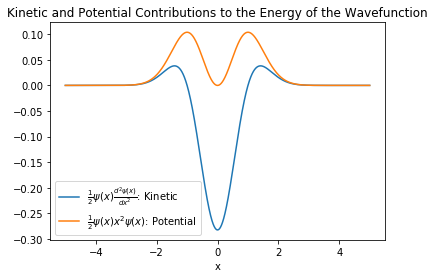

In [9]:
# Creating numpy arrays for wavefunction and second derivative.
psi = psi_f_2(x)
d2psi = d2f(psi_f_2, x, dx)

# Calculating kinetic contribution.
dKE = 0.5*psi*d2psi

# Calculating potential contribution.
dPE = 0.5*psi*psi*x*x

# Plotting the kinetic and potential contributions.
plt.plot(x, dKE, label = r"$\frac{1}{2}\psi(x) \frac{d^2\psi(x)}{dx^2} $: Kinetic")
plt.plot(x, dPE, label = r"$ \frac{1}{2}\psi(x)x^2\psi(x)$: Potential")
plt.xlabel("x")
plt.title("Kinetic and Potential Contributions to the Energy of the Wavefunction")
plt.legend()
plt.show()

In [14]:
# Scipy Calculations

# Calculate Kinetic Energy
KE = -integrate.simps(dKE, x)

# Calculate Potential Energy
PE = integrate.simps(dPE, x)

# Print results
print('Kinetic energy = ' + str(KE) + ' .')
print('Potential energy = ' + str(PE) + ' .')
print('total energy = ' + str((KE + PE)) + ' .')

Kinetic energy = 0.2499999687691449 .
Potential energy = 0.2499999999799287 .
total energy = 0.4999999687490736 .


In [15]:
# Energy Formula Calculation

def QHO_E(alpha):
    """
    Energy function for 1-Dimensional Wave Equation.
    """
    
    a = alpha
    
    E_GS =  (a/2) + (1/(8*a))
    
    return E_GS

print('total energy = ' + str(QHO_E(0.5)) + ' .')

total energy = 0.5 .


### Conclusions
As we can see from now calcualting the energy contributions for $ \alpha = 0.5 $ the approximations we have used are very accurate. It is also interesting how when we made $ \alpha = 0.5 $ the contributions from kinetic and potential energy became equal.